# Principal Component Analysis(PCA)

In [74]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
imagelist=['amy1.png','amy2.png','andrew1.png','andrew2.png','andy1.png','andy2.png','erin1.png','erin2.png','gabe1.png','gabe2.png','hill2.png','hill4.png','jack1.png','jack2.png','zach1.png','zach2.png']

train_img=[]
for file in imagelist:
    first=np.array(imageio.imread('Train/'+file))
    m,n=first.shape
    first=np.reshape(first,(m*n,1))
    train_img.append(first)

print(m,n)
img_train=np.matrix(np.array(train_img))
train_img=np.transpose(img_train)
m,n=train_img.shape
print("train_img.shape=",m,n)

150 125
train_img.shape= 18750 16


### Calculating average face vector

In [75]:
avgface=np.ones((m,1))
for i in range(0,m):
    avgface[i]=np.mean(train_img[i])
print("The average face vector is",avgface)

The average face vector is [[136.5625]
 [141.625 ]
 [148.375 ]
 ...
 [ 90.0625]
 [ 94.1875]
 [ 98.8125]]


### Subtracting average face vector from all faces

In [76]:
for i in range(0,n):
    img_train[i]=img_train[i]-np.transpose(avgface)
print("img_train.shape=",img_train.shape)

img_train.shape= (16, 18750)


### Calculating covariance matrix and eigen values 

In [77]:
covmat=(img_train*np.transpose(img_train))

eigen,u=np.linalg.eig(covmat)
print("eigen values are")
print(eigen)

eigen values are
[1995.62534091  526.36200377 -542.47656392  373.80570775  347.28470427
 -417.50588552  201.4544505  -331.93452424  151.97472555  113.09965382
 -239.98114411 -231.20841688 -152.34066293 -122.26041606  -61.63484033
    2.73586741]


### Determining value of k best faces

In [78]:
a,s,v=np.linalg.svd(covmat)


summation=np.sum(s)
print(summation)
for k in range(1,len(s)):
    sigma=0
    for i in range(0,k):
        sigma+=s[i]
    sigma=sigma/summation
    if(sigma>=0.95):
        print("selected value of k is",k)
        break

##selecting k eigen vectors from the set of 16 vectors
eigenvectors=np.empty((k,16))
for i in range(0,k):
    temp=np.empty((1,16))
    for j in range(0,16):
        temp[0,j]=u[i,j]
    eigenvectors[i]=temp


mappedeigenvectors=train_img*np.transpose(eigenvectors)
print(mappedeigenvectors.shape)

weightmatrix=np.transpose(mappedeigenvectors)*np.transpose(img_train)
print(weightmatrix.shape)

5811.684907963562
selected value of k is 13
(18750, 13)
(13, 16)


### Testing unknown face

Minimum Distance =  986572867.3525797
Face =  gabe1.png


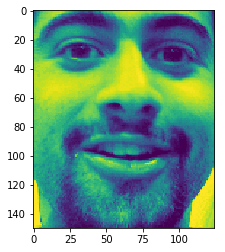

In [79]:
image=imageio.imread('Test/gabe3.png')
m,n=image.shape
image=np.reshape(image,(m*n,1))
normalisedface=image-avgface
testweight=np.transpose(mappedeigenvectors)*normalisedface
transposeweightmatrix=np.transpose(weightmatrix)
m,n=transposeweightmatrix.shape
flag=0
store=[]
for i in range(0,m):
    difference=transposeweightmatrix[i]-np.transpose(testweight)
    totaldiff=np.sum(np.power(difference,2))
    totaldiff=np.sqrt(totaldiff)
    store.append(totaldiff)
    if(totaldiff <= min(store)):
        pos = i
    
    
a=min(store)

print("Minimum Distance = ",a)
print("Face = ",imagelist[pos])
y='Train/'+imagelist[pos]
x = imageio.imread(y)
plt.imshow(x)